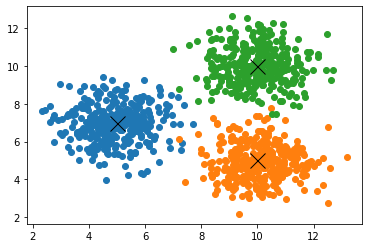

In [1]:
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

centers = np.array([[5,7],
                  [10,5],
                  [10,10]])
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

# GMM

Algorithm
![](kmeans.png)

EM
![](EM.png)

In [2]:
def GMM(X, K):
    # initialization
    prior = np.array([1/K] * K)

    S = np.array(
        [[[1,0],[0,1]]
        for i in range(K)])

    m = np.random.rand(K,X.shape[1])* 10
    means = []
    means.append(m)
    
    for e in range(100):
        # Expectation Step
        h = np.array([
            [multivariate_normal.pdf(x, m[i], S[i]) *  prior[i] 
            for i in range(K)] for x in X])
        h = h/h.sum(keepdims =True, axis = 1)

        # Maximisation Step
        m = np.array([(X * h[:, i:(i+1)]).sum(axis = 0) for i in range(K)])
        m = m/h.sum(keepdims =True, axis = 0).T

        S = []
        for i in range(K):
            Si = X - m[i,:]
            hi = h[:, i:(i+1)]
            Shi = Si * hi
            Si = Shi.T.dot(Si)/hi.sum()
            S.append(Si)
        S = np.array(S)

        prior = h.mean(axis = 0)
        
        # Stop if change in m is too low
        if ((means[-1] - m)**2).sum() < 0.0000001:
            break

        means.append(m)
        print(e, prior)
    return means

In [3]:
def draw(X, means, ix = 0):
    print(means[ix])
    for i in range(3):
        plt.plot(X[y==i,0], X[y==i,1], 'o')
    for i in range(3):
        plt.plot(means[ix][i,0], means[ix][i,1], 'kx', markersize = 15)

In [4]:
means = GMM(X, K = 3)

0 [0.50026679 0.26811513 0.23161808]
1 [0.46206093 0.29049386 0.2474452 ]
2 [0.42280602 0.31173327 0.26546072]
3 [0.39532722 0.32397682 0.28069596]
4 [0.37483313 0.32991625 0.29525062]
5 [0.35938303 0.33278316 0.30783381]
6 [0.34850331 0.33421852 0.31727817]
7 [0.34163203 0.3349112  0.32345677]
8 [0.33777346 0.33520808 0.32701846]
9 [0.33584147 0.33531533 0.3288432 ]
10 [0.33495152 0.3353473  0.32970118]
11 [0.33455929 0.33535485 0.33008586]
12 [0.33438964 0.3353559  0.33025447]
13 [0.33431675 0.33535563 0.33032761]
14 [0.33428551 0.3353553  0.33035919]


[[8.56507223 7.76748557]
 [5.71515827 9.91843118]
 [8.46928395 2.88838555]]


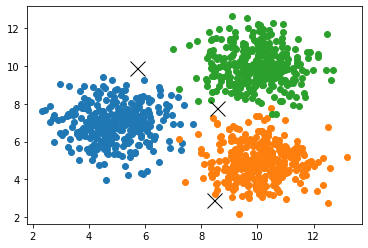

In [5]:
draw(X, means, ix = 0)

[[9.42742877 8.47553221]
 [5.03070613 7.63368598]
 [9.68501925 4.47444653]]


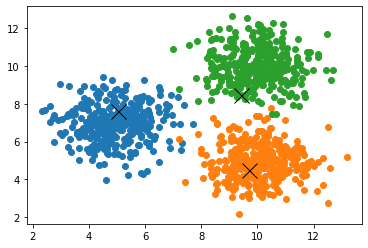

In [6]:
draw(X, means, ix = 1)

[[9.58129984 8.84695821]
 [4.84321119 7.20574723]
 [9.99896545 4.61531517]]


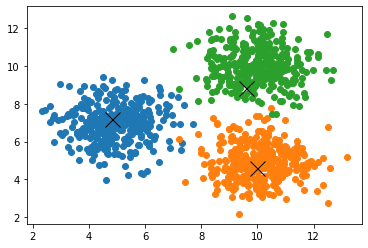

In [7]:
draw(X, means, ix = 2)

[[ 9.96124692 10.03418104]
 [ 4.92101102  6.96798796]
 [10.07411321  4.94027039]]


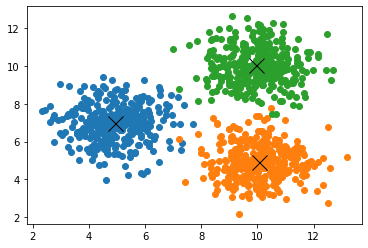

In [8]:
draw(X, means, ix = len(means) - 1)